# Final Project 

## Team members: Evelyn Yoon & Sangwon Lee

In [1]:
import io
from zipfile import ZipFile
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
df = pd.read_csv(r'C:\Users\user\Desktop\DAV5400\H1b_kaggle.csv')
df.head()

Unnamed: 0          CASE_STATUS  \
0           1  CERTIFIED-WITHDRAWN   
1           2  CERTIFIED-WITHDRAWN   
2           3  CERTIFIED-WITHDRAWN   
3           4  CERTIFIED-WITHDRAWN   
4           5            WITHDRAWN   

                                       EMPLOYER_NAME  \
0                             UNIVERSITY OF MICHIGAN   
1                             GOODMAN NETWORKS, INC.   
2                          PORTS AMERICA GROUP, INC.   
3  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4                          PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   

  FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE  \
0                  N          36067.0  2016.0      ANN ARBOR, MICHIGAN   
1                  Y         242674.0  2016.0             PLANO, TEXAS   
2                  Y         193066.0  2016.0  JERSEY CITY, NEW JERSEY   
3                  Y         220314.0  2016.0         DENVER, COLORADO   
4                  Y         157518.4  2016.0      ST. LOUIS, MISSOURI   

          lon        lat  
0  -83.743038  42.280826  
1  -96.698886  33.019843  
2  -74.077642  40.728158  
3 -104.990251  39.739236  
4  -90.199404  38.627003

In [34]:
df_clean = df.drop(columns=['Unnamed: 0','lon','lat','FULL_TIME_POSITION','SOC_NAME'])
df_clean.head()

CASE_STATUS                                      EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN                             UNIVERSITY OF MICHIGAN   
1  CERTIFIED-WITHDRAWN                             GOODMAN NETWORKS, INC.   
2  CERTIFIED-WITHDRAWN                          PORTS AMERICA GROUP, INC.   
3  CERTIFIED-WITHDRAWN  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4            WITHDRAWN                          PEABODY INVESTMENTS CORP.   

                      JOB_TITLE  PREVAILING_WAGE    YEAR  \
0  POSTDOCTORAL RESEARCH FELLOW          36067.0  2016.0   
1       CHIEF OPERATING OFFICER         242674.0  2016.0   
2         CHIEF PROCESS OFFICER         193066.0  2016.0   
3   REGIONAL PRESIDEN, AMERICAS         220314.0  2016.0   
4  PRESIDENT MONGOLIA AND INDIA         157518.4  2016.0   

                  WORKSITE  
0      ANN ARBOR, MICHIGAN  
1             PLANO, TEXAS  
2  JERSEY CITY, NEW JERSEY  
3         DENVER, COLORADO  
4      ST. LOUIS, MISSOURI

In [5]:
# The direct link to the Kaggle data set
data_url = 'https://www.kaggle.com/jonamjar/h1b-data-set-2017/data#H-1B_Disclosure_Data_FY17.csv'

# The local path where the data set is saved.
local_filename = "H-1B_Disclosure_Data_FY17.csv"

# Kaggle Username and Password
kaggle_info = {'UserName': "byoon111", 'Password': "save1234"}

# Download the CSV file.
r = requests.get(data_url)

# Login to Kaggle and retrieve the data.
r = requests.post(r.url, data = kaggle_info)

# Writes the data to a local file one chunk at a time.
f = open(local_filename, 'wb')
for chunk in r.iter_content(chunk_size = 512 * 1024): # Reads 512KB at a time into memory
    if chunk: # filter out keep-alive new chunks
        f.write(chunk)
f.close()

In [ ]:
df1 = pd.read_csv(r'C:\Users\user\H-1B_Disclosure_Data_FY17.csv')
df1.head()

In [6]:
df1_clean = df1.drop(columns=['CASE_NUMBER','CASE_SUBMITTED','DECISION_DATE','VISA_CLASS','EMPLOYMENT_START_DATE',
                              'EMPLOYMENT_END_DATE','SUPPORT_H1B','EMPLOYER_BUSINESS_DBA','H1B_DEPENDENT',
                              'WILLFUL_VIOLATOR','LABOR_CON_AGREE',
                              'PUBLIC_DISCLOSURE_LOCATION','WORKSITE_COUNTY',
                              'WORKSITE_POSTAL_CODE','ORIGINAL_CERT_DATE','EMPLOYER_ADDRESS',
                             'EMPLOYER_POSTAL_CODE','EMPLOYER_COUNTRY','EMPLOYER_PROVINCE',
                             'EMPLOYER_PHONE','EMPLOYER_PHONE_EXT','PW_UNIT_OF_PAY','PW_WAGE_LEVEL',
                             'PW_SOURCE','PW_SOURCE_YEAR','PW_SOURCE_OTHER','WAGE_RATE_OF_PAY_TO',
                             'WAGE_UNIT_OF_PAY','AGENT_REPRESENTING_EMPLOYER','AGENT_ATTORNEY_NAME',
                             'AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','CONTINUED_EMPLOYMENT',
                             'CHANGE_PREVIOUS_EMPLOYMENT','NEW_CONCURRENT_EMPLOYMENT','CHANGE_EMPLOYER',
                             'AMENDED_PETITION','FULL_TIME_POSITION','WAGE_RATE_OF_PAY_FROM',
                             'Unnamed: 0','SOC_CODE','SOC_NAME','NAICS_CODE','TOTAL_WORKERS',
                             'NEW_EMPLOYMENT','EMPLOYER_STATE','EMPLOYER_CITY','WORKSITE_STATE'])

In [7]:
df1_clean.head()

CASE_STATUS              EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN     DISCOVER PRODUCTS INC.   
1  CERTIFIED-WITHDRAWN           DFS SERVICES LLC   
2  CERTIFIED-WITHDRAWN  EASTBANC TECHNOLOGIES LLC   
3            WITHDRAWN          INFO SERVICES LLC   
4  CERTIFIED-WITHDRAWN           BB&T CORPORATION   

                                      JOB_TITLE  PREVAILING_WAGE WORKSITE_CITY  
0                    ASSOCIATE DATA INTEGRATION          59197.0    RIVERWOODS  
1                              SENIOR ASSOCIATE          49800.0    RIVERWOODS  
2                      .NET SOFTWARE PROGRAMMER          76502.0    WASHINGTON  
3                               PROJECT MANAGER          90376.0   JERSEY CITY  
4  ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES         116605.0      NEW YORK

In [10]:
df1_clean['YEAR']='2017'
df1_clean.head()

CASE_STATUS              EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN     DISCOVER PRODUCTS INC.   
1  CERTIFIED-WITHDRAWN           DFS SERVICES LLC   
2  CERTIFIED-WITHDRAWN  EASTBANC TECHNOLOGIES LLC   
3            WITHDRAWN          INFO SERVICES LLC   
4  CERTIFIED-WITHDRAWN           BB&T CORPORATION   

                                      JOB_TITLE  PREVAILING_WAGE  \
0                    ASSOCIATE DATA INTEGRATION          59197.0   
1                              SENIOR ASSOCIATE          49800.0   
2                      .NET SOFTWARE PROGRAMMER          76502.0   
3                               PROJECT MANAGER          90376.0   
4  ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES         116605.0   

  WORKSITE_CITY  YEAR  
0    RIVERWOODS  2017  
1    RIVERWOODS  2017  
2    WASHINGTON  2017  
3   JERSEY CITY  2017  
4      NEW YORK  2017

In [11]:
regex = r'(?P<City>[^,]+)'
df_clean['WORKSITE'] = df_clean['WORKSITE'].str.extract(regex)
df_clean.head()

CASE_STATUS                                      EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN                             UNIVERSITY OF MICHIGAN   
1  CERTIFIED-WITHDRAWN                             GOODMAN NETWORKS, INC.   
2  CERTIFIED-WITHDRAWN                          PORTS AMERICA GROUP, INC.   
3  CERTIFIED-WITHDRAWN  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4            WITHDRAWN                          PEABODY INVESTMENTS CORP.   

                      JOB_TITLE  PREVAILING_WAGE    YEAR     WORKSITE  
0  POSTDOCTORAL RESEARCH FELLOW          36067.0  2016.0    ANN ARBOR  
1       CHIEF OPERATING OFFICER         242674.0  2016.0        PLANO  
2         CHIEF PROCESS OFFICER         193066.0  2016.0  JERSEY CITY  
3   REGIONAL PRESIDEN, AMERICAS         220314.0  2016.0       DENVER  
4  PRESIDENT MONGOLIA AND INDIA         157518.4  2016.0    ST. LOUIS

In [12]:
df1_clean = df1_clean.rename(index = str, columns = {"WORKSITE_CITY": "WORKSITE"})
df1_clean

CASE_STATUS                          EMPLOYER_NAME  \
0       CERTIFIED-WITHDRAWN                 DISCOVER PRODUCTS INC.   
1       CERTIFIED-WITHDRAWN                       DFS SERVICES LLC   
2       CERTIFIED-WITHDRAWN              EASTBANC TECHNOLOGIES LLC   
3                 WITHDRAWN                      INFO SERVICES LLC   
4       CERTIFIED-WITHDRAWN                       BB&T CORPORATION   
5       CERTIFIED-WITHDRAWN                   SUNTRUST BANKS, INC.   
6       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
7       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
8       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
9       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
10      CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
11      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
12      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
13      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
14      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
15      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
16                WITHDRAWN                               ITAS INC   
17      CERTIFIED-WITHDRAWN                               BATTELLE   
18      CERTIFIED-WITHDRAWN   HARMONY SCIENCE ACADEMY-HOUSTON HIGH   
19      CERTIFIED-WITHDRAWN           HARMONY SCIENCE ACADEMY-WACO   
20      CERTIFIED-WITHDRAWN                 IDC TECHNOLOGIES, INC.   
21      CERTIFIED-WITHDRAWN                               BATTELLE   
22      CERTIFIED-WITHDRAWN     OREGON HEALTH & SCIENCE UNIVERSITY   
23      CERTIFIED-WITHDRAWN                             GIMMAL LLC   
24      CERTIFIED-WITHDRAWN         HARMONY SCIENCE ACADEMY-EULESS   
25      CERTIFIED-WITHDRAWN                      PLANTRONICS, INC.   
26      CERTIFIED-WITHDRAWN              THE UNIVERSITY OF CHICAGO   
27      CERTIFIED-WITHDRAWN  UNIVERSITY OF CALIFORNIA, LOS ANGELES   
28      CERTIFIED-WITHDRAWN        AXCESS FINANCIAL SERVICES, INC.   
29      CERTIFIED-WITHDRAWN            WASHINGTON STATE UNIVERSITY   
...                     ...                                    ...   
624620               DENIED         ELLIOTT MANAGEMENT CORPORATION   
624621            WITHDRAWN        I NET SOFTWARE TECHNOLOGIES INC   
624622            WITHDRAWN                 NTT DATA SERVICES, LLC   
624623            WITHDRAWN             FRONTIER TECHNOLOGIES, LLC   
624624            WITHDRAWN        AVANI TECHNOLOGY SOLUTIONS INC.   
624625            WITHDRAWN                 NTT DATA SERVICES, LLC   
624626            WITHDRAWN              PHILIPS NORTH AMERICA LLC   
624627            WITHDRAWN                           AMPCUS, INC.   
624628            WITHDRAWN              VIGILANT TECHNOLOGIES LLC   
624629            WITHDRAWN                            ZUORA, INC.   
624630            WITHDRAWN     WASHINGTON UNIVERSITY IN ST. LOUIS   
624631            WITHDRAWN               ARTEMIS CONSULTING, INC.   
624632            WITHDRAWN                   BANK OF AMERICA N.A.   
624633            WITHDRAWN      HALLIBURTON ENERGY SERVICES, INC.   
624634            WITHDRAWN           ADVANCED MICRO DEVICES, INC.   
624635            WITHDRAWN                       CONSUMERINFO.COM   
624636            WITHDRAWN     MICHAEL MALTZAN ARCHITECTURE, INC.   
624637            WITHDRAWN        L&T TECHNOLOGY SERVICES LIMITED   
624638            WITHDRAWN                      HCL AMERICA, INC.   
624639            WITHDRAWN                   TECHNOSOFT GROUP INC   
624640            WITHDRAWN             FRONTIER TECHNOLOGIES, LLC   
624641            WITHDRAWN                     CASA SYSTEMS, INC.   
624642  CERTIFIED-WITHDRAWN               STLPORT CONSULTING, INC.   
624643  CERTIFIED-WITHDRAWN               STLPORT CONSULTING, INC.   
624644  CERTIFIED-WITHDRAWN               STLPORT CONSULTING, INC.   
624645  CERTIFIED-WITHDRAW

In [13]:
column_list = ["CASE_STATUS", "EMPLOYER_NAME", "JOB_TITLE", "PREVAILING_WAGE", "WORKSITE", "YEAR"]
result = pd.DataFrame(data=df_clean, columns=column_list)
result1 = pd.DataFrame(data=df1_clean, columns=column_list)

In [14]:
result.head()

CASE_STATUS                                      EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN                             UNIVERSITY OF MICHIGAN   
1  CERTIFIED-WITHDRAWN                             GOODMAN NETWORKS, INC.   
2  CERTIFIED-WITHDRAWN                          PORTS AMERICA GROUP, INC.   
3  CERTIFIED-WITHDRAWN  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4            WITHDRAWN                          PEABODY INVESTMENTS CORP.   

                      JOB_TITLE  PREVAILING_WAGE     WORKSITE    YEAR  
0  POSTDOCTORAL RESEARCH FELLOW          36067.0    ANN ARBOR  2016.0  
1       CHIEF OPERATING OFFICER         242674.0        PLANO  2016.0  
2         CHIEF PROCESS OFFICER         193066.0  JERSEY CITY  2016.0  
3   REGIONAL PRESIDEN, AMERICAS         220314.0       DENVER  2016.0  
4  PRESIDENT MONGOLIA AND INDIA         157518.4    ST. LOUIS  2016.0

In [15]:
result1.head()

CASE_STATUS              EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN     DISCOVER PRODUCTS INC.   
1  CERTIFIED-WITHDRAWN           DFS SERVICES LLC   
2  CERTIFIED-WITHDRAWN  EASTBANC TECHNOLOGIES LLC   
3            WITHDRAWN          INFO SERVICES LLC   
4  CERTIFIED-WITHDRAWN           BB&T CORPORATION   

                                      JOB_TITLE  PREVAILING_WAGE     WORKSITE  \
0                    ASSOCIATE DATA INTEGRATION          59197.0   RIVERWOODS   
1                              SENIOR ASSOCIATE          49800.0   RIVERWOODS   
2                      .NET SOFTWARE PROGRAMMER          76502.0   WASHINGTON   
3                               PROJECT MANAGER          90376.0  JERSEY CITY   
4  ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES         116605.0     NEW YORK   

   YEAR  
0  2017  
1  2017  
2  2017  
3  2017  
4  2017

In [16]:
# appends the rows from the two Dataframes to create the df_all_rows Dataframe

#df_all_rows = pd.concat([result, result1])
#df_all_rows

In [17]:
# df_all_rows=df_all_rows.reset_index(drop=True)
# df_all_rows

In [18]:
#final = pd.merge(result, result1, how='outer', left_on = 'CASE_STATUS', right_on = 'EMPLOYER_NAME')
#final

In [19]:
final = result.append(result1, ignore_index=True, sort=False)
final

CASE_STATUS  \
0        CERTIFIED-WITHDRAWN   
1        CERTIFIED-WITHDRAWN   
2        CERTIFIED-WITHDRAWN   
3        CERTIFIED-WITHDRAWN   
4                  WITHDRAWN   
5        CERTIFIED-WITHDRAWN   
6        CERTIFIED-WITHDRAWN   
7        CERTIFIED-WITHDRAWN   
8        CERTIFIED-WITHDRAWN   
9                  WITHDRAWN   
10       CERTIFIED-WITHDRAWN   
11       CERTIFIED-WITHDRAWN   
12       CERTIFIED-WITHDRAWN   
13       CERTIFIED-WITHDRAWN   
14       CERTIFIED-WITHDRAWN   
15       CERTIFIED-WITHDRAWN   
16       CERTIFIED-WITHDRAWN   
17       CERTIFIED-WITHDRAWN   
18                 CERTIFIED   
19                 CERTIFIED   
20       CERTIFIED-WITHDRAWN   
21       CERTIFIED-WITHDRAWN   
22                 CERTIFIED   
23                 CERTIFIED   
24       CERTIFIED-WITHDRAWN   
25                 CERTIFIED   
26       CERTIFIED-WITHDRAWN   
27                 CERTIFIED   
28                 CERTIFIED   
29                 CERTIFIED   
...                      ...   
3627078               DENIED   
3627079            WITHDRAWN   
3627080            WITHDRAWN   
3627081            WITHDRAWN   
3627082            WITHDRAWN   
3627083            WITHDRAWN   
3627084            WITHDRAWN   
3627085            WITHDRAWN   
3627086            WITHDRAWN   
3627087            WITHDRAWN   
3627088            WITHDRAWN   
3627089            WITHDRAWN   
3627090            WITHDRAWN   
3627091            WITHDRAWN   
3627092            WITHDRAWN   
3627093            WITHDRAWN   
3627094            WITHDRAWN   
3627095            WITHDRAWN   
3627096            WITHDRAWN   
3627097            WITHDRAWN   
3627098            WITHDRAWN   
3627099            WITHDRAWN   
3627100  CERTIFIED-WITHDRAWN   
3627101  CERTIFIED-WITHDRAWN   
3627102  CERTIFIED-WITHDRAWN   
3627103  CERTIFIED-WITHDRAWN   
3627104            CERTIFIED   
3627105            CERTIFIED   
3627106            CERTIFIED   
3627107            CERTIFIED   

                                             EMPLOYER_NAME  \
0                                   UNIVERSITY OF MICHIGAN   
1                                   GOODMAN NETWORKS, INC.   
2                                PORTS AMERICA GROUP, INC.   
3        GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4                                PEABODY INVESTMENTS CORP.   
5                                  BURGER KING CORPORATION   
6                         BT AND MK ENERGY AND COMMODITIES   
7                          GLOBO MOBILE TECHNOLOGIES, INC.   
8                                       ESI COMPANIES INC.   
9                                LESSARD INTERNATIONAL LLC   
10                                      H.J. HEINZ COMPANY   
11                                 DOW CORNING CORPORATION   
12                                        ACUSHNET COMPANY   
13                                           BIOCAIR, INC.   
14                              NEWMONT MINING CORPORATION   
15                                            VRICON, INC.   
16                             CARDIAC SCIENCE CORPORATION   
17                                   WESTFIELD CORPORATION   
18                                          QUICKLOGIX LLC   
19                                   MCCHRYSTAL GROUP, LLC   
20                                       CUDDLE BARN, INC.   
21                                   WESTFIELD CORPORATION   
22                                             LOMICS, LLC   
23                UC UNIVERSITY HIGH SCHOOL EDUCATION INC.   
24                                  VMS COMMUNICATIONS LLC   
25                                        QUICKLOGIX, INC.   
26                              FOODESSENTIALS CORPORATION   
27                                              HELLO INC.   
28                                              UMBEL CORP   
29                 PERSPECTIVES OF FREEDOM FOUNDATION, INC   
...                                                    ...   
3627078                     ELLIOTT MANAGEMENT C

# 1. How the trend of total petitions has been changed over recent years?

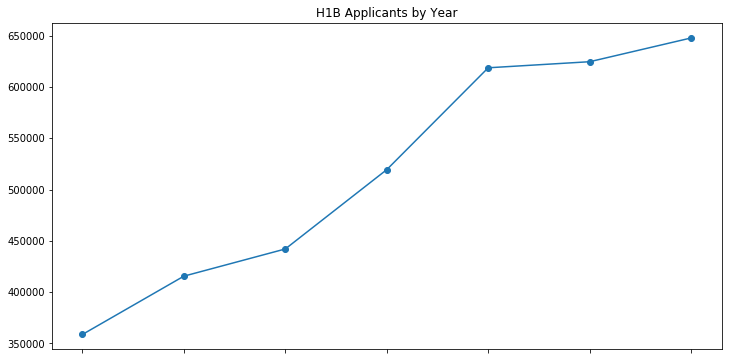

In [20]:
plt.figure(figsize=(12,6))
final['YEAR'].value_counts().sort_values().plot(marker='o')
plt.title('H1B Applicants by Year')
plt.show()

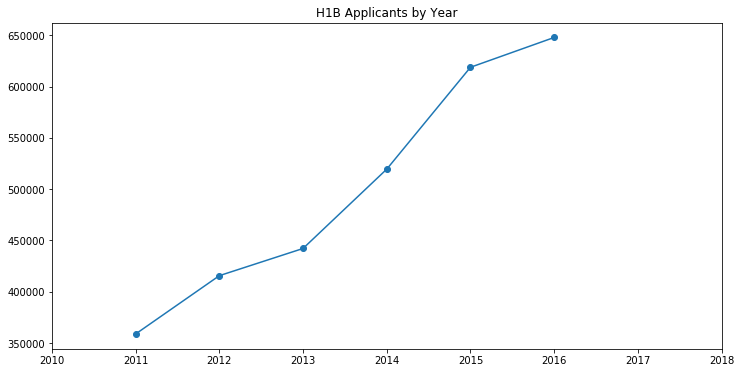

In [21]:
plt.figure(figsize=(12,6))
result['YEAR'].value_counts().sort_values().plot(marker='o')
plt.title('H1B Applicants by Year')
plt.xlim([2010,2018])
plt.show()

# 2. What is the most popular job of those that applying the visa? Which employers file the most petitions over the year?

In [31]:
name_count = final.groupby('JOB_TITLE').size()
top_10_job = name_count.sort_values(ascending=False)[:10]
print(top_10_job)

JOB_TITLE
PROGRAMMER ANALYST          296189
SOFTWARE ENGINEER           149257
COMPUTER PROGRAMMER          77873
SYSTEMS ANALYST              72763
SOFTWARE DEVELOPER           59014
BUSINESS ANALYST             47091
COMPUTER SYSTEMS ANALYST     41641
SENIOR SOFTWARE ENGINEER     34116
TECHNOLOGY LEAD - US         31162
ASSISTANT PROFESSOR          30222
dtype: int64


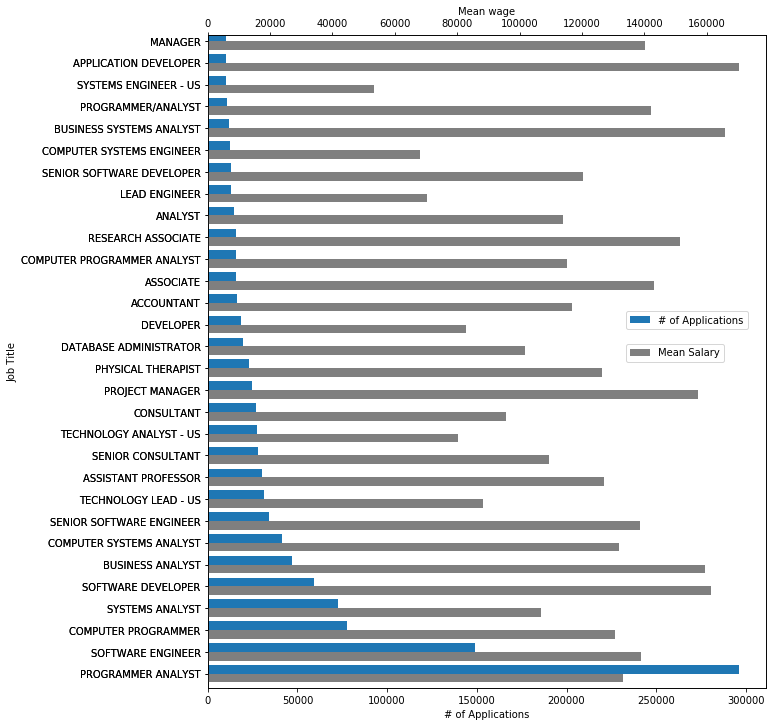

In [29]:
pjob = final[['JOB_TITLE', 'EMPLOYER_NAME', 'PREVAILING_WAGE']].groupby(['JOB_TITLE'])
tjob = list(pjob.count().sort_values(by='EMPLOYER_NAME', ascending=False).head(30).index)
dfa = pjob.count().loc[tjob].assign(mean_wage=PopJobsAll.mean().loc[tjob])
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
width = 0.35
dfa.EMPLOYER_NAME.plot(kind='barh', ax=ax1, color='C0', width=0.4, position=0, label='# of Applications')
dfa.mean_wage.plot(kind='barh', ax=ax2, color='C7', width=0.4, position=1, label='Mean Salary')
ax1.set_xlabel('# of Applications')
ax1.set_ylabel('')
ax1.legend(loc=(0.75,0.55))
ax2.set_xlabel('Mean wage')
ax2.set_ylabel('Job Title')
ax2.legend(loc=(0.75,0.50))
plt.show()

In [32]:
name_count = final.groupby('EMPLOYER_NAME').size()
top_10_EMPLOYER_NAME = name_count.sort_values(ascending=False)[:10]
print(top_10_EMPLOYER_NAME)

EMPLOYER_NAME
INFOSYS LIMITED                      151179
TATA CONSULTANCY SERVICES LIMITED     78255
WIPRO LIMITED                         53294
DELOITTE CONSULTING LLP               43921
IBM INDIA PRIVATE LIMITED             42953
ACCENTURE LLP                         40137
MICROSOFT CORPORATION                 30581
HCL AMERICA, INC.                     26941
CAPGEMINI AMERICA INC                 26329
ERNST & YOUNG U.S. LLP                24328
dtype: int64


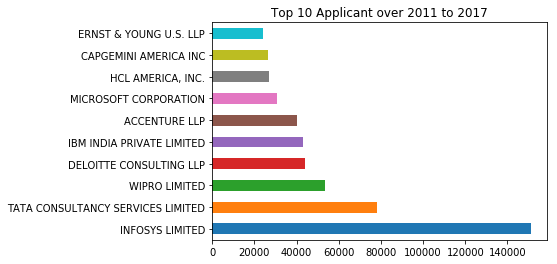

In [23]:
emp = final['EMPLOYER_NAME'].groupby([final['EMPLOYER_NAME']]).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Top 10 Applicant over 2011 to 2017")
emp.set_ylabel("")
plt.show()

We can see that indeed IT jobs are the most popular ones. There are only few non-IT jobs in top 20. All top 5 polular jobs are IT. Note that the #6 is "Business analyst", which also needs many computer and analysis skills. Among IT jobs, we can see a very interesting fact that "Programmer analyst" and "Software engineer" are very dominant in the whole job market, especially the first one. But these 2 jobs are not that dominant in top 10 applicants (plot above). This implies that the job demand category of top 10 applicants is a bit different with that of whole market. Note that number of applications from top 10 applicants is about 14% of whole market, which is not very signicicant but indeed high.

It is very interesting to see "Assistant professor" in the list of the most popular jobs (#11, just miss top10!). I don't think we are expecting to see it in this list.

Another interesting observation here is that "Data Scientist" jobs is not in the list. People are talking about it everyday at every corners. Posted jobs for Data Scientist can be found plenty on any job searching site like Glassdoor. The reason for this missing is that, although the number of Data Scientist jobs is increasing rapidly recently (see figure bellow), but it has just become very hot recently and it needs time to have large enough number of jobs to be in the top list!

# 3. Which job has the highest wage? 

In [48]:
high_job=final['JOB_TITLE'].value_counts().sort_values(ascending=False)[:20].to_frame()
final[final['JOB_TITLE'].isin(high_job.index)&(final['PREVAILING_WAGE']<=150000)].groupby(['JOB_TITLE'])['PREVAILING_WAGE'].mean().to_frame().sort_values(by='PREVAILING_WAGE')

PREVAILING_WAGE
JOB_TITLE                                   
ACCOUNTANT                      45586.815335
ASSISTANT PROFESSOR             57079.779599
PHYSICAL THERAPIST              57335.527687
TECHNOLOGY ANALYST - US         58680.898279
COMPUTER PROGRAMMER             59668.807514
PROGRAMMER ANALYST              59841.043940
BUSINESS ANALYST                60788.242171
COMPUTER PROGRAMMER ANALYST     61720.908593
DATABASE ADMINISTRATOR          62689.405212
SYSTEMS ANALYST                 62864.980530
COMPUTER SYSTEMS ANALYST        64338.700120
DEVELOPER                       65672.100708
CONSULTANT                      67428.717930
SOFTWARE DEVELOPER              70288.245133
TECHNOLOGY LEAD - US            73925.856741
SENIOR CONSULTANT               76671.416260
PROJECT MANAGER                 76911.412228
ASSOCIATE                       77617.518112
SOFTWARE ENGINEER               79516.307596
SENIOR SOFTWARE ENGINEER        95544.641786

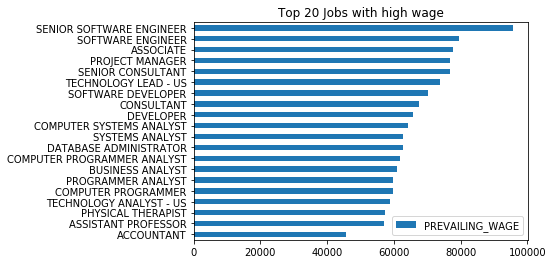

In [50]:
high_job=final['JOB_TITLE'].value_counts().sort_values(ascending=False)[:20].to_frame()
tt = final[final['JOB_TITLE'].isin(high_job.index)&(final['PREVAILING_WAGE']<=150000)].groupby(['JOB_TITLE'])['PREVAILING_WAGE'].mean().to_frame().sort_values(by='PREVAILING_WAGE').plot(kind='barh', title="Top 20 Jobs with high wage")
tt.set_ylabel("")
plt.show()

# 4. In which cities were the foreigners able to find jobs?

In [61]:
work = final['WORKSITE'].value_counts()
place = work[(work.values>10000)]

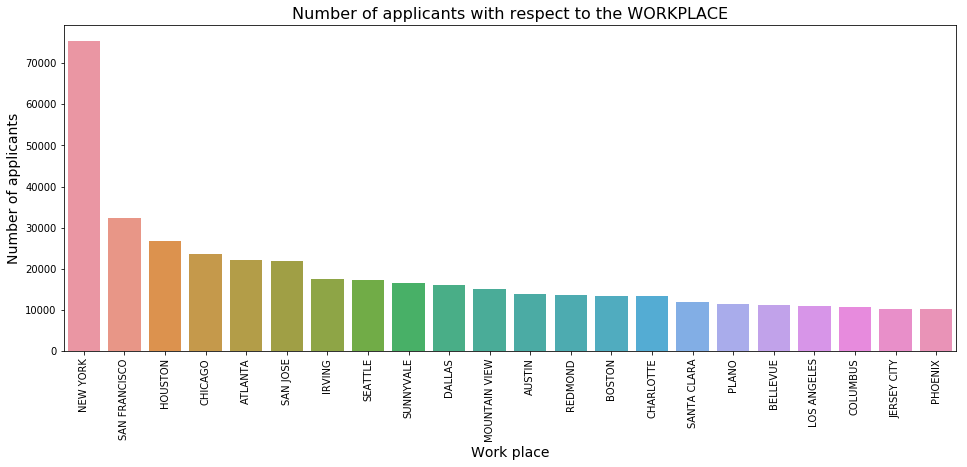

In [62]:
plt.figure(figsize=(16,6))
sns.barplot(place.index, place.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Work place', fontsize=14)
plt.ylabel('Number of applicants', fontsize=14)
plt.title("Number of applicants with respect to the WORKPLACE", fontsize=16)
plt.show()

In [35]:
sal_state=df.groupby(['lat','lon','WORKSITE'])['PREVAILING_WAGE'].median().sort_values(ascending=False).reset_index()
appli=df.groupby(['lat','lon'])['Unnamed: 0'].count().reset_index()
locate=sal_state[['lat','lon']]
sal=sal_state['PREVAILING_WAGE']
state=sal_state['WORKSITE']
def color_producer(elevation):
    if elevation < 75000:
        return 'red'
    elif 75000 <= elevation < 100000:
        return 'orange'
    else:
        return 'green'
map1 = folium.Map(location=[39.50, -98.35],tiles='CartoDB dark_matter',zoom_start=3.5)
for point in sal_state.index:
    folium.CircleMarker(list(locate.loc[point]),popup='<b>Average Salary in $: </b>'+str(sal.loc[point])+"<br><b> State: "+str(state.loc[point]),radius=sal.loc[point]*0.0001,color=color_producer(sal.loc[point]),fill_color=color_producer(sal.loc[point]),fill=True).add_to(map1)
map1

# 5. What’s the wage distribution for H1B applicants?

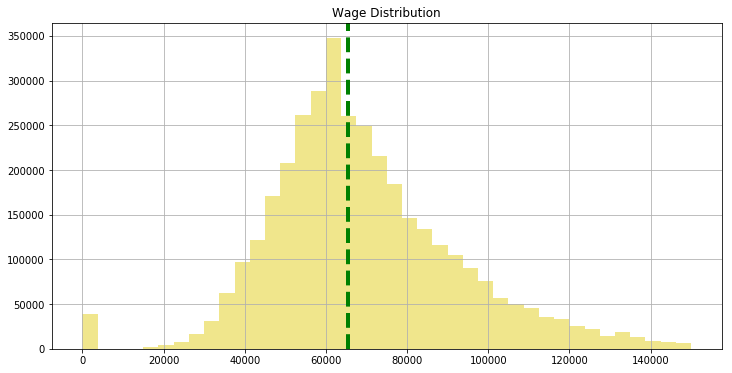

In [63]:
plt.figure(figsize=(12,6))
final[final['PREVAILING_WAGE']<150000].PREVAILING_WAGE.hist(bins=40,color='khaki')
plt.axvline(final[final['PREVAILING_WAGE']<=150000].PREVAILING_WAGE.median(), 
            color='green', linestyle='dashed', linewidth=4)
plt.title('Wage Distribution')
plt.show()

There are many outliers in the prevailing wages, with values ranging up to billion dollars. The distribution is skewed towards the right. These are likely to bias the mean estimate. Thus we checked the median wage, which gives a better estimate as compared to the mean wage. Lets now split the wages by their CASE_STATUS.

In [46]:
column_list = ["CASE_STATUS", "EMPLOYER_NAME", "JOB_TITLE","SOC_NAME","YEAR"]
result = pd.DataFrame(data=df, columns=column_list)
result1 = pd.DataFrame(data=df1, columns=column_list)

In [47]:
result

CASE_STATUS  \
0        CERTIFIED-WITHDRAWN   
1        CERTIFIED-WITHDRAWN   
2        CERTIFIED-WITHDRAWN   
3        CERTIFIED-WITHDRAWN   
4                  WITHDRAWN   
5        CERTIFIED-WITHDRAWN   
6        CERTIFIED-WITHDRAWN   
7        CERTIFIED-WITHDRAWN   
8        CERTIFIED-WITHDRAWN   
9                  WITHDRAWN   
10       CERTIFIED-WITHDRAWN   
11       CERTIFIED-WITHDRAWN   
12       CERTIFIED-WITHDRAWN   
13       CERTIFIED-WITHDRAWN   
14       CERTIFIED-WITHDRAWN   
15       CERTIFIED-WITHDRAWN   
16       CERTIFIED-WITHDRAWN   
17       CERTIFIED-WITHDRAWN   
18                 CERTIFIED   
19                 CERTIFIED   
20       CERTIFIED-WITHDRAWN   
21       CERTIFIED-WITHDRAWN   
22                 CERTIFIED   
23                 CERTIFIED   
24       CERTIFIED-WITHDRAWN   
25                 CERTIFIED   
26       CERTIFIED-WITHDRAWN   
27                 CERTIFIED   
28                 CERTIFIED   
29                 CERTIFIED   
...                      ...   
3002428            WITHDRAWN   
3002429            WITHDRAWN   
3002430            WITHDRAWN   
3002431            WITHDRAWN   
3002432            WITHDRAWN   
3002433            WITHDRAWN   
3002434            WITHDRAWN   
3002435            WITHDRAWN   
3002436            WITHDRAWN   
3002437            WITHDRAWN   
3002438            WITHDRAWN   
3002439            WITHDRAWN   
3002440            WITHDRAWN   
3002441            WITHDRAWN   
3002442            WITHDRAWN   
3002443            WITHDRAWN   
3002444            WITHDRAWN   
3002445                  NaN   
3002446                  NaN   
3002447                  NaN   
3002448                  NaN   
3002449                  NaN   
3002450                  NaN   
3002451                  NaN   
3002452                  NaN   
3002453                  NaN   
3002454                  NaN   
3002455                  NaN   
3002456                  NaN   
3002457                  NaN   

                                             EMPLOYER_NAME  \
0                                   UNIVERSITY OF MICHIGAN   
1                                   GOODMAN NETWORKS, INC.   
2                                PORTS AMERICA GROUP, INC.   
3        GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4                                PEABODY INVESTMENTS CORP.   
5                                  BURGER KING CORPORATION   
6                         BT AND MK ENERGY AND COMMODITIES   
7                          GLOBO MOBILE TECHNOLOGIES, INC.   
8                                       ESI COMPANIES INC.   
9                                LESSARD INTERNATIONAL LLC   
10                                      H.J. HEINZ COMPANY   
11                                 DOW CORNING CORPORATION   
12                                        ACUSHNET COMPANY   
13                                           BIOCAIR, INC.   
14                              NEWMONT MINING CORPORATION   
15                                            VRICON, INC.   
16                             CARDIAC SCIENCE CORPORATION   
17                                   WESTFIELD CORPORATION   
18                                          QUICKLOGIX LLC   
19                                   MCCHRYSTAL GROUP, LLC   
20                                       CUDDLE BARN, INC.   
21                                   WESTFIELD CORPORATION   
22                                             LOMICS, LLC   
23                UC UNIVERSITY HIGH SCHOOL EDUCATION INC.   
24                                  VMS COMMUNICATIONS LLC   
25                                        QUICKLOGIX, INC.   
26                              FOODESSENTIALS CORPORATION   
27                                              HELLO INC.   
28                                              UMBEL CORP   
29                 PERSPECTIVES OF FREEDOM FOUNDATION, INC   
...                                                    ...   
3002428                     AVANT HEALTHCARE PRO

In [48]:
result1

CASE_STATUS                          EMPLOYER_NAME  \
0       CERTIFIED-WITHDRAWN                 DISCOVER PRODUCTS INC.   
1       CERTIFIED-WITHDRAWN                       DFS SERVICES LLC   
2       CERTIFIED-WITHDRAWN              EASTBANC TECHNOLOGIES LLC   
3                 WITHDRAWN                      INFO SERVICES LLC   
4       CERTIFIED-WITHDRAWN                       BB&T CORPORATION   
5       CERTIFIED-WITHDRAWN                   SUNTRUST BANKS, INC.   
6       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
7       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
8       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
9       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
10      CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
11      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
12      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
13      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
14      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
15      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
16                WITHDRAWN                               ITAS INC   
17      CERTIFIED-WITHDRAWN                               BATTELLE   
18      CERTIFIED-WITHDRAWN   HARMONY SCIENCE ACADEMY-HOUSTON HIGH   
19      CERTIFIED-WITHDRAWN           HARMONY SCIENCE ACADEMY-WACO   
20      CERTIFIED-WITHDRAWN                 IDC TECHNOLOGIES, INC.   
21      CERTIFIED-WITHDRAWN                               BATTELLE   
22      CERTIFIED-WITHDRAWN     OREGON HEALTH & SCIENCE UNIVERSITY   
23      CERTIFIED-WITHDRAWN                             GIMMAL LLC   
24      CERTIFIED-WITHDRAWN         HARMONY SCIENCE ACADEMY-EULESS   
25      CERTIFIED-WITHDRAWN                      PLANTRONICS, INC.   
26      CERTIFIED-WITHDRAWN              THE UNIVERSITY OF CHICAGO   
27      CERTIFIED-WITHDRAWN  UNIVERSITY OF CALIFORNIA, LOS ANGELES   
28      CERTIFIED-WITHDRAWN        AXCESS FINANCIAL SERVICES, INC.   
29      CERTIFIED-WITHDRAWN            WASHINGTON STATE UNIVERSITY   
...                     ...                                    ...   
624620               DENIED         ELLIOTT MANAGEMENT CORPORATION   
624621            WITHDRAWN        I NET SOFTWARE TECHNOLOGIES INC   
624622            WITHDRAWN                 NTT DATA SERVICES, LLC   
624623            WITHDRAWN             FRONTIER TECHNOLOGIES, LLC   
624624            WITHDRAWN        AVANI TECHNOLOGY SOLUTIONS INC.   
624625            WITHDRAWN                 NTT DATA SERVICES, LLC   
624626            WITHDRAWN              PHILIPS NORTH AMERICA LLC   
624627            WITHDRAWN                           AMPCUS, INC.   
624628            WITHDRAWN              VIGILANT TECHNOLOGIES LLC   
624629            WITHDRAWN                            ZUORA, INC.   
624630            WITHDRAWN     WASHINGTON UNIVERSITY IN ST. LOUIS   
624631            WITHDRAWN               ARTEMIS CONSULTING, INC.   
624632            WITHDRAWN                   BANK OF AMERICA N.A.   
624633            WITHDRAWN      HALLIBURTON ENERGY SERVICES, INC.   
624634            WITHDRAWN           ADVANCED MICRO DEVICES, INC.   
624635            WITHDRAWN                       CONSUMERINFO.COM   
624636            WITHDRAWN     MICHAEL MALTZAN ARCHITECTURE, INC.   
624637            WITHDRAWN        L&T TECHNOLOGY SERVICES LIMITED   
624638            WITHDRAWN                      HCL AMERICA, INC.   
624639            WITHDRAWN                   TECHNOSOFT GROUP INC   
624640            WITHDRAWN             FRONTIER TECHNOLOGIES, LLC   
624641            WITHDRAWN                     CASA SYSTEMS, INC.   
624642  CERTIFIED-WITHDRAWN               STLPORT CONSULTING, INC.   
624643  CERTIFIED-WITHDRAWN               STLPORT CONSULTING, INC.   
624644  CERTIFIED-WITHDRAWN               STLPORT CONSULTING, INC.   
624645  CERTIFIED-WITHDRAW

In [51]:
years = sorted(list((df['YEAR'].unique())))
##### Remove the NAN element ####
years.pop()
##### Convert float to integer ####
years = [ int(x) for x in years ]

In [52]:
passed = df[(df['CASE_STATUS']=='CERTIFIED')]
values = list(passed.groupby('YEAR').size())

In [53]:
sum(values) == len(passed)

True

In [55]:
result1

CASE_STATUS                          EMPLOYER_NAME  \
0       CERTIFIED-WITHDRAWN                 DISCOVER PRODUCTS INC.   
1       CERTIFIED-WITHDRAWN                       DFS SERVICES LLC   
2       CERTIFIED-WITHDRAWN              EASTBANC TECHNOLOGIES LLC   
3                 WITHDRAWN                      INFO SERVICES LLC   
4       CERTIFIED-WITHDRAWN                       BB&T CORPORATION   
5       CERTIFIED-WITHDRAWN                   SUNTRUST BANKS, INC.   
6       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
7       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
8       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
9       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
10      CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
11      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
12      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
13      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
14      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
15      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
16                WITHDRAWN                               ITAS INC   
17      CERTIFIED-WITHDRAWN                               BATTELLE   
18      CERTIFIED-WITHDRAWN   HARMONY SCIENCE ACADEMY-HOUSTON HIGH   
19      CERTIFIED-WITHDRAWN           HARMONY SCIENCE ACADEMY-WACO   
20      CERTIFIED-WITHDRAWN                 IDC TECHNOLOGIES, INC.   
21      CERTIFIED-WITHDRAWN                               BATTELLE   
22      CERTIFIED-WITHDRAWN     OREGON HEALTH & SCIENCE UNIVERSITY   
23      CERTIFIED-WITHDRAWN                             GIMMAL LLC   
24      CERTIFIED-WITHDRAWN         HARMONY SCIENCE ACADEMY-EULESS   
25      CERTIFIED-WITHDRAWN                      PLANTRONICS, INC.   
26      CERTIFIED-WITHDRAWN              THE UNIVERSITY OF CHICAGO   
27      CERTIFIED-WITHDRAWN  UNIVERSITY OF CALIFORNIA, LOS ANGELES   
28      CERTIFIED-WITHDRAWN        AXCESS FINANCIAL SERVICES, INC.   
29      CERTIFIED-WITHDRAWN            WASHINGTON STATE UNIVERSITY   
...                     ...                                    ...   
624620               DENIED         ELLIOTT MANAGEMENT CORPORATION   
624621            WITHDRAWN        I NET SOFTWARE TECHNOLOGIES INC   
624622            WITHDRAWN                 NTT DATA SERVICES, LLC   
624623            WITHDRAWN             FRONTIER TECHNOLOGIES, LLC   
624624            WITHDRAWN        AVANI TECHNOLOGY SOLUTIONS INC.   
624625            WITHDRAWN                 NTT DATA SERVICES, LLC   
624626            WITHDRAWN              PHILIPS NORTH AMERICA LLC   
624627            WITHDRAWN                           AMPCUS, INC.   
624628            WITHDRAWN              VIGILANT TECHNOLOGIES LLC   
624629            WITHDRAWN                            ZUORA, INC.   
624630            WITHDRAWN     WASHINGTON UNIVERSITY IN ST. LOUIS   
624631            WITHDRAWN               ARTEMIS CONSULTING, INC.   
624632            WITHDRAWN                   BANK OF AMERICA N.A.   
624633            WITHDRAWN      HALLIBURTON ENERGY SERVICES, INC.   
624634            WITHDRAWN           ADVANCED MICRO DEVICES, INC.   
624635            WITHDRAWN                       CONSUMERINFO.COM   
624636            WITHDRAWN     MICHAEL MALTZAN ARCHITECTURE, INC.   
624637            WITHDRAWN        L&T TECHNOLOGY SERVICES LIMITED   
624638            WITHDRAWN                      HCL AMERICA, INC.   
624639            WITHDRAWN                   TECHNOSOFT GROUP INC   
624640            WITHDRAWN             FRONTIER TECHNOLOGIES, LLC   
624641            WITHDRAWN                     CASA SYSTEMS, INC.   
624642  CERTIFIED-WITHDRAWN               STLPORT CONSULTING, INC.   
624643  CERTIFIED-WITHDRAWN               STLPORT CONSULTING, INC.   
624644  CERTIFIED-WITHDRAWN               STLPORT CONSULTING, INC.   
624645  CERTIFIED-WITHDRAW

In [4]:
import requests

In [5]:
# The direct link to the Kaggle data set
data_url = 'https://www.kaggle.com/jonamjar/h1b-data-set-2017/downloads/h1b-data-set-2017.csv'

# The local path where the data set is saved.
local_filename = "h1b.csv"

# Kaggle Username and Password
kaggle_info = {'UserName': "byoon111", 'Password': "save1234"}

r_p = requests.post(r.url, data=kaggle_info)

# Attempts to download the CSV file. Gets rejected because we are not logged in.
r = requests.get(data_url)

r_p

NameError: name 'r' is not defined

In [9]:
# The direct link to the Kaggle data set
data_url = 'https://www.kaggle.com/jonamjar/h1b-data-set-2017/downloads/h1b-data-set-2017.csv'

# The local path where the data set is saved.
local_filename = "h1b.csv"

# Kaggle Username and Password
kaggle_info = {'UserName': "byoon1", 'Password': "pp"}

# Attempts to download the CSV file. Gets rejected because we are not logged in.
r = requests.get(data_url)

# Login to Kaggle and retrieve the data.
r = requests.post(r.url, data = kaggle_info, prefetch = False)

# Writes the data to a local file one chunk at a time.
f = open(local_filename, 'w')
for chunk in r.iter_content(chunk_size = 512 * 1024): # Reads 512KB at a time into memory
    if chunk: # filter out keep-alive new chunks
        f.write(chunk)
f.close()

TypeError: request() got an unexpected keyword argument 'prefetch'